<a href="https://colab.research.google.com/github/swallowdig/mainquest/blob/main/MainQuest04%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [864]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [865]:
!pip install kagglehub

In [866]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df_copy = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')

df.shape

Path to dataset files: /kaggle/input/online-retail


(541909, 8)

In [867]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [868]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [869]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [870]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

/tmp/ipython-input-3844768752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [871]:
df_sample = df.sample(n=1000,replace= True,random_state = 4)

In [872]:
df_sample

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
485815,577689,23368,SET 12 COLOUR PENCILS DOLLY GIRL,16,2011-11-21 11:29:00,0.65,17664.0,United Kingdom,10.40,0,11
377541,569555,22152,PLACE SETTING WHITE STAR,24,2011-10-05 08:17:00,0.42,17728.0,United Kingdom,10.08,2,10
120705,546670,22267,EASTER DECORATION EGG BUNNY,3,2011-03-15 15:37:00,1.25,13451.0,United Kingdom,3.75,1,3
107578,545460,22976,CIRCUS PARADE CHILDRENS EGG CUP,1,2011-03-02 17:33:00,1.25,13230.0,United Kingdom,1.25,2,3
458492,575840,23241,TREASURE TIN GYMKHANA DESIGN,6,2011-11-11 11:56:00,2.08,13137.0,United Kingdom,12.48,4,11
...,...,...,...,...,...,...,...,...,...,...,...
253176,559162,22059,CERAMIC STRAWBERRY DESIGN MUG,1,2011-07-06 16:29:00,3.29,NaN,United Kingdom,3.29,2,7
520070,580260,22945,CHRISTMAS METAL TAGS ASSORTED,12,2011-12-02 12:36:00,0.85,14085.0,United Kingdom,10.20,4,12
513660,579558,21217,RED RETROSPOT ROUND CAKE TINS,2,2011-11-30 11:24:00,9.95,14755.0,United Kingdom,19.90,2,11
247943,558777,22250,DECORATION BUTTERFLY MAGIC GARDEN,1,2011-07-04 10:23:00,0.83,NaN,United Kingdom,0.83,0,7


In [873]:
df['TotalPrice'].agg(["mean","std"])

,TotalPrice
mean,17.987795
std,378.810824


In [874]:
df_sample['TotalPrice'].agg(["mean","std"])

,TotalPrice
mean,15.830650
std,39.393534


In [875]:
df_dif = pd.DataFrame({
    "df": df['TotalPrice'].agg(["mean","std"]),
    "Sample(1000)": df_sample['TotalPrice'].agg(["mean","std"])
})
df_dif
#표본의 평균 분포는 중심극한정리에 의해 정규분포에 가까워짐 따라서 표본은 모집단의 평균을 잘 추정할수있고 표본의 표준편차는 모집단보다 조금 다르지만 비슷한 값을가짐

,df,Sample(1000)
mean,17.987795,15.830650
std,378.810824,39.393534


## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [876]:
df.groupby("Country").count().sort_values(by="Quantity",ascending=False)[:2]

#가장 주문이많음 상위국가 데이터 확인

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,DayOfWeek,InvoiceMonth
Country,,,,,,,,,,
United Kingdom,495478,495478,494024,495478,495478,495478,361878,495478,495478,495478
Germany,9495,9495,9495,9495,9495,9495,9495,9495,9495,9495


In [877]:
top2 = df["Country"].value_counts().head(2).index.tolist()  #상위 국가추출
top2
country1 = df[df["Country"] == top2[0]]["TotalPrice"]
country2 = df[df["Country"] == top2[1]]["TotalPrice"]
t_stat, p_value = ttest_ind(country1, country2, equal_var=False) #t검정 사용
print("t-통계량:", t_stat)
print("p-값:", p_value)


t-통계량: -10.046360185819829
p-값: 9.823416115791871e-24


In [878]:
# 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.                                     # United Kingdom	,Germany
# 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.      #p_value 값이 0.05보다 훨신 작으므로 통계적으로 유의미하다고 할수있다
# t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.         #t통계의 값이 음수인 이유는 상위1국가의 평균보다 상위2국가의 평균이 더 크다는것을 의미하고 p_value값은 유의확률보다
                                                                                                          #훨신 낮으므로 평균에 차이가있다는 귀무가설을 기각할수있습니다

#1종오류 실제로 평균이 같은데 이번검정에서 평균이 다르다고 오판하는경우
#2종오류 실제로 평균이 다른데 이번검정에서 평균이 같다고 오판하는경우
#이번검정에서 p-value 값이 너무 작아 기각했으므로 1종오류의 가능성이 있음

In [879]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

In [880]:

def detect_outliers(df,columns):
    q1=df[columns].quantile(0.25)
    q3=df[columns].quantile(0.75)
    iqr=q3-q1

    boundary=1.5*iqr

    index1=df[df[columns] > q3+boundary].index
    index2=df[df[columns] < q1-boundary].index

    df[columns]=df[columns].drop(index1)
    df[columns]=df[columns].drop(index2)

    return df
detect_outliers(df,"UnitPrice")
#unitprice에 있는 이상치를 제거한다

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,4,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,4,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,4,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,4,12


In [881]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


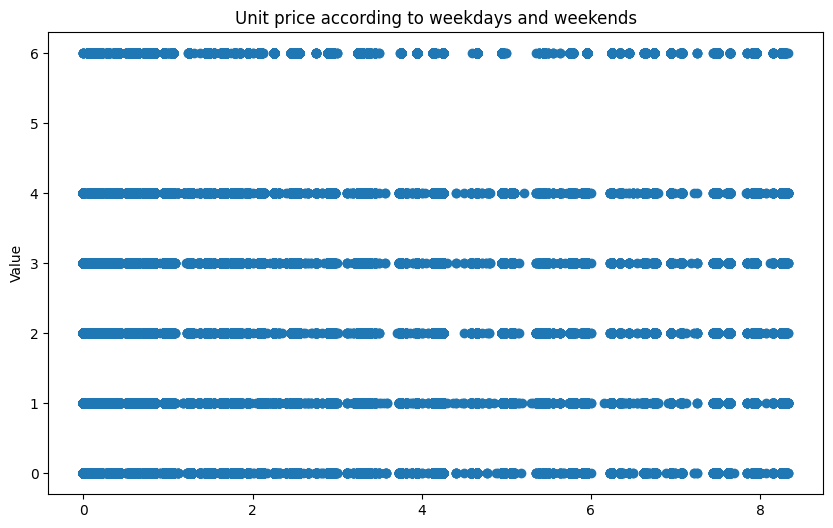

In [882]:

plt.figure(figsize=(10, 6))
plt.scatter(x=df["UnitPrice"], y=df["DayOfWeek"])
plt.title('Unit price according to weekdays and weekends')
plt.ylabel('Value')
plt.show()
#주말보다 주중에 지출이 많다

In [883]:

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df["DayOfWeek"] = df['InvoiceDate'] .dt.dayofweek

df["WeekType"] = df["DayOfWeek"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

stats = df.groupby("WeekType")["UnitPrice"].agg(
    mean="mean",              # 평균
    median="median",          # 중앙값
    std="std",                # 표준편차
    var="var",                # 분산
    q25=lambda x: x.quantile(0.25),  # 1사분위수
    q75=lambda x: x.quantile(0.75)   # 3사분위수
)

print(stats)


              mean  median       std       var   q25   q75
WeekType                                                  
Weekday   2.552716    1.95  1.931074  3.729047  1.25  3.75
Weekend   2.303662    1.65  1.802483  3.248944  1.06  2.95


In [884]:
stats.describe()

,mean,median,std,var,q25,q75
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000
mean,2.428189,1.800000,1.866778,3.488995,1.15500,3.350000
std,0.176108,0.212132,0.090928,0.339484,0.13435,0.565685
min,2.303662,1.650000,1.802483,3.248944,1.06000,2.950000
25%,2.365925,1.725000,1.834630,3.368970,1.10750,3.150000
50%,2.428189,1.800000,1.866778,3.488995,1.15500,3.350000
75%,2.490453,1.875000,1.898926,3.609021,1.20250,3.550000
max,2.552716,1.950000,1.931074,3.729047,1.25000,3.750000


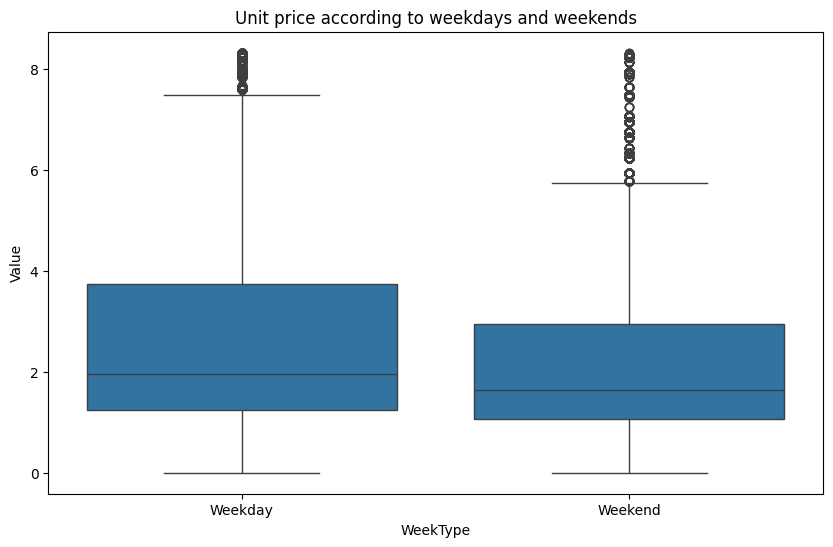

In [885]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x ="WeekType", y ="UnitPrice", data=df)
plt.title('Unit price according to weekdays and weekends')
plt.ylabel('Value')
plt.show()
#주말보다 주중에 지출이 많다

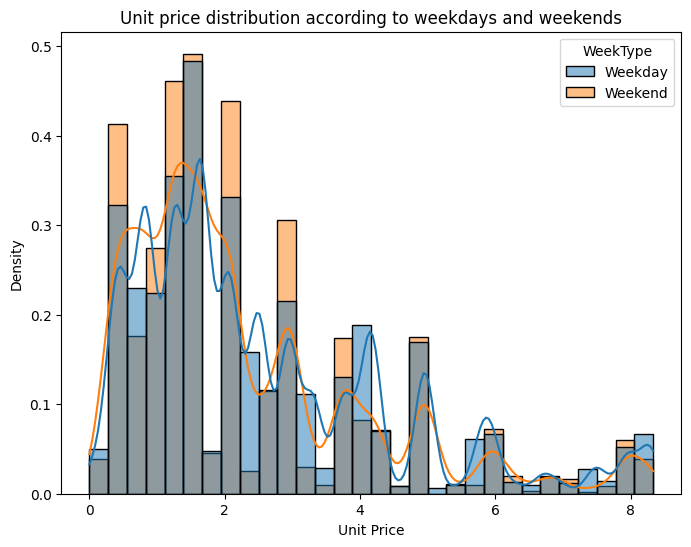

In [886]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="UnitPrice", hue="WeekType", kde=True, bins=30, stat="density", common_norm=False)
plt.title('Unit price distribution according to weekdays and weekends')
plt.xlabel('Unit Price')
plt.ylabel('Density')
plt.show()

## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [887]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [888]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df_copy['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df_copy['DayOfWeek'] = df_copy['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df_copy["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df_copy["InvoiceMonth"] = df_copy["InvoiceDate"].dt.month

In [889]:
df_copy[['Quantity', 'UnitPrice', 'Country','DayOfWeek','InvoiceMonth']].info()
df_copy[['Quantity', 'UnitPrice', 'Country','DayOfWeek','InvoiceMonth']].isnull().sum()

#결측치확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Quantity      541909 non-null  int64  
 1   UnitPrice     541909 non-null  float64
 2   Country       541909 non-null  object 
 3   DayOfWeek     541909 non-null  int32  
 4   InvoiceMonth  541909 non-null  int32  
dtypes: float64(1), int32(2), int64(1), object(1)
memory usage: 16.5+ MB


,0
Quantity,0
UnitPrice,0
Country,0
DayOfWeek,0
InvoiceMonth,0


In [890]:
df_copy.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,DayOfWeek,InvoiceMonth
count,541909.000000,541909,541909.000000,406829.000000,541909.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,2.431277,7.553128
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,0.000000,1.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,1.000000,5.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,2.000000,8.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,4.000000,11.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,6.000000,12.000000
std,218.081158,NaN,96.759853,1713.600303,1.844709,3.509055


In [891]:
Q1_quantity = df_copy['Quantity'].quantile(0.25)
Q3_quantity = df_copy['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity
df_copy = df_copy[(df_copy['Quantity'] >= lower_bound_quantity) & (df_copy['Quantity'] <= upper_bound_quantity)]

Q1_price = df_copy['UnitPrice'].quantile(0.25)
Q3_price = df_copy['UnitPrice'].quantile(0.75)
IQR_price = Q3_price - Q1_price

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price
df_copy = df_copy[(df_copy['UnitPrice'] >= lower_bound_price) & (df_copy['UnitPrice'] <= upper_bound_price)]


# 이상치 제거

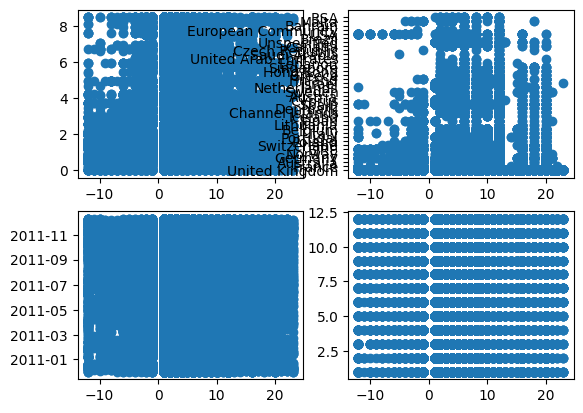

In [892]:
#이상치확인

fig,ax=plt.subplots(2,2)

ax[0,0]

ax[0,0].scatter(x=df_copy['Quantity'], y=df_copy['UnitPrice'])

ax[0,1].scatter(x=df_copy['Quantity'], y=df_copy['Country'])

ax[1,0].scatter(x=df_copy['Quantity'], y=df_copy['InvoiceDate'])

ax[1,1].scatter(x=df_copy['Quantity'], y=df_copy['InvoiceMonth'])

plt.show()

In [893]:
df_copy['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Germany', 'Norway',
       'EIRE', 'Switzerland', 'Poland', 'Portugal', 'Italy', 'Belgium',
       'Lithuania', 'Japan', 'Iceland', 'Channel Islands', 'Denmark',
       'Spain', 'Cyprus', 'Austria', 'Sweden', 'Netherlands', 'Israel',
       'Finland', 'Greece', 'Hong Kong', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [894]:
df_copy = pd.get_dummies(df, columns=['Country'], drop_first=True)
#범주형 데이터 원핫인코딩

In [895]:
df_copy.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,39627
CustomerID,135080
TotalPrice,0
DayOfWeek,0
InvoiceMonth,0


In [896]:
df_copy=df_copy.fillna(0)

In [897]:
X = df_copy[['UnitPrice', 'DayOfWeek', 'InvoiceMonth'] + [col for col in df_copy.columns if 'Country_' in col]]
y = df_copy['Quantity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [898]:
df_copy['UnitPrice'] = df_copy['UnitPrice'].fillna(df_copy['UnitPrice'].mean())

In [899]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [900]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [901]:
y_pred = model.predict(X_test_scaled)
print("회귀 계수:", model.coef_)
print("절편 (Intercept):", model.intercept_)
print("결정 계수 (R^2):", r2_score(y_test, y_pred))

회귀 계수: [ -3.13527453  -0.19244892  -0.09409859  -1.46121827  -0.34263323
  -3.35992137  -0.37978663  -0.78108442  -1.93507171  -1.88434695
  -0.35395896  -1.20419618  -5.73321285  -0.5971265   -1.75921519
  -6.53653567  -6.99124622  -0.87163789  -1.09536588  -0.95198954
  -1.15154622  -2.09512411   0.03547991  -0.51554014  -0.35893344
  -0.86801676   1.36085377  -2.14693276  -1.34134637  -2.85604184
  -0.60511864  -0.24691832  -0.85644264  -3.70845932   0.23005089
  -3.06216221  -1.45247822  -0.55914888 -15.78949774  -1.68264421]
절편 (Intercept): 9.544332878921036
결정 계수 (R^2): 0.0292097617279633


In [ ]:
#회귀계수는 각 독립변수가 종속변수에 미치는 영향을 나타냅니다. 즉 독립변수가 종속변수에 미치는 영향의 변화량을 의미합니다.
#절편은 독립변수가 0일때 판매수량의 예측값 입니다.
#결정계수는 1에 가까울수록 모델이 더 많은 변동성을 설명한다고 볼수있습니다. 지금데이터에서 0.029라는값은 매우낮은값이므로 판매수량을 잘 설명하지 못하고있으며 예측력이 매우 낮은상태입니다.
#비선형모델시도,다른변수추가,등으로 개선하는작업이 필요할것같습니다


## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [902]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

In [903]:
df_copy['IsReturn'] = df_copy['Quantity'].apply(lambda x: 1 if x < 0 else 0)
#피셔생성

In [904]:
X = df_copy[['UnitPrice', 'DayOfWeek', 'InvoiceMonth'] + [col for col in df_copy.columns if 'Country_' in col]]
y = df_copy['IsReturn']

In [905]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
#데이터셋 분리

In [906]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [907]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [908]:
y_pred = model.predict(X_test_scaled)

In [909]:
cm = confusion_matrix(y_test, y_pred)
print("혼동 행렬:\n", cm)
print("\n분류 리포트:\n", classification_report(y_test, y_pred))

혼동 행렬:
 [[106252      0]
 [  2130      0]]

분류 리포트:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    106252
           1       0.00      0.00      0.00      2130

    accuracy                           0.98    108382
   macro avg       0.49      0.50      0.50    108382
weighted avg       0.96      0.98      0.97    108382



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [910]:
#분석및 해석 전체적인 정확도는 높은편이나 예측면에서 전혀 예측하지못하는 결과를 보여줍니다.
#모델의 성능을 높히기위해서 앙상블 모델을사용하거나 불균형데이터에 더 좋은성능을내는 비용 민감한학습을 사용하면 더좋은 모델을 생성할수있겠습니다.